This is a **Multi-layer Neural Network** version of King County house price prediction. Neural network has been implemented by keras library..

In [1]:
#
# Import packages
#
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras import metrics
from keras.optimizers import Adam, RMSprop

Using TensorFlow backend.


In [2]:
#
# Load data from CSV file
#
kc_data_org = pd.read_csv("../input/kc_house_data.csv")
kc_data_org.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
#
# Transform dates into year, month and day and select columns.
#
kc_data_org['sale_yr'] = pd.to_numeric(kc_data_org.date.str.slice(0, 4))
kc_data_org['sale_month'] = pd.to_numeric(kc_data_org.date.str.slice(4, 6))
kc_data_org['sale_day'] = pd.to_numeric(kc_data_org.date.str.slice(6, 8))

kc_data = pd.DataFrame(kc_data_org, columns=[
        'sale_yr','sale_month','sale_day',
        'bedrooms','bathrooms','sqft_living','sqft_lot','floors',
        'condition','grade','sqft_above','sqft_basement','yr_built',
        'zipcode','lat','long','sqft_living15','sqft_lot15','price'])
label_col = 'price'

print(kc_data.describe(include='all'))
kc_data.head()

            sale_yr    sale_month      ...          sqft_lot15         price
count  21613.000000  21613.000000      ...        21613.000000  2.161300e+04
mean    2014.322954      6.574423      ...        12768.455652  5.400881e+05
std        0.467616      3.115308      ...        27304.179631  3.671272e+05
min     2014.000000      1.000000      ...          651.000000  7.500000e+04
25%     2014.000000      4.000000      ...         5100.000000  3.219500e+05
50%     2014.000000      6.000000      ...         7620.000000  4.500000e+05
75%     2015.000000      9.000000      ...        10083.000000  6.450000e+05
max     2015.000000     12.000000      ...       871200.000000  7.700000e+06

[8 rows x 19 columns]


,sale_yr,sale_month,sale_day,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,2014,10,13,3,1.00,1180,5650,1.0,3,7,1180,0,1955,98178,47.5112,-122.257,1340,5650,221900.0
1,2014,12,9,3,2.25,2570,7242,2.0,3,7,2170,400,1951,98125,47.7210,-122.319,1690,7639,538000.0
2,2015,2,25,2,1.00,770,10000,1.0,3,6,770,0,1933,98028,47.7379,-122.233,2720,8062,180000.0
3,2014,12,9,4,3.00,1960,5000,1.0,5,7,1050,910,1965,98136,47.5208,-122.393,1360,5000,604000.0
4,2015,2,18,3,2.00,1680,8080,1.0,3,8,1680,0,1987,98074,47.6168,-122.045,1800,7503,510000.0


In [4]:
#
# Split data to train and test and normalize data
#
def train_test_split(df, test_percent=.2, seed=None):
    train_percent = 1.0 - test_percent
    np.random.seed(seed)
    perm = np.random.permutation(df.index)
    m = len(df)
    train_end = int(train_percent * m)
    train = perm[:train_end]
    test = perm[train_end:]
    return train, test

train_data, test_data = train_test_split (kc_data)

x_train = np.array(kc_data.loc[train_data, :].drop(label_col, axis=1).iloc[:])
y_train = np.array(kc_data.loc[train_data, [label_col]].iloc[:])

x_test = np.array(kc_data.loc[test_data, :].drop(label_col, axis=1).iloc[:])
y_test = np.array(kc_data.loc[test_data, [label_col]].iloc[:])

# Normalize Input Data
x_scaler = MinMaxScaler().fit(x_train)
y_scaler = MinMaxScaler().fit(y_train)
    
X_train = x_scaler.transform(x_train)
X_test = x_scaler.transform(x_test) 
Y_train = y_scaler.fit_transform(y_train)
Y_test = y_scaler.fit_transform(y_test) 

input_size = X_train.shape[1]
output_size = Y_train.shape[1]

print('X_train.shape', X_train.shape)
print('Y_train.shape', Y_train.shape)

print('X_test.shape', X_test.shape)
print('Y_test.shape', Y_test.shape)

print('Input Size', input_size)
print('Output Size', output_size)


X_train.shape (17290, 18)
Y_train.shape (17290, 1)
X_test.shape (4323, 18)
Y_test.shape (4323, 1)
Input Size 18
Output Size 1


In [5]:
#
# Build mutli layer neural network model
#
network = Sequential()
network.add(Dense(18, activation="relu", input_shape=(input_size,)))
network.add(Dropout(0.3))
network.add(Dense(9, activation="relu"))
network.add(Dropout(0.1))
network.add(Dense(3, activation="relu"))
network.add(Dense(output_size))

network.compile(loss='mean_squared_error', optimizer=Adam(), metrics=[metrics.mae])
print(network.summary())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 18)                342       
_________________________________________________________________
dropout_1 (Dropout)          (None, 18)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 171       
_________________________________________________________________
dropout_2 (Dropout)          (None, 9)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 30        
_________________________________________________________________
dense_4 (Dense)      

In [6]:
#
# Train the model
#
network.fit(X_train, Y_train, epochs=30, batch_size = 32, shuffle=True)

train_score = network.evaluate(X_train, Y_train, verbose=0)
valid_score = network.evaluate(X_test, Y_test, verbose=0)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
17290/17290 [==============================] - 3s 162us/step - loss: 0.0030 - mean_absolute_error: 0.0344
Epoch 2/30
17290/17290 [==============================] - 2s 87us/step - loss: 0.0021 - mean_absolute_error: 0.0296
Epoch 3/30
17290/17290 [==============================] - 2s 87us/step - loss: 0.0015 - mean_absolute_error: 0.0248
Epoch 4/30
17290/17290 [==============================] - 2s 87us/step - loss: 0.0013 - mean_absolute_error: 0.0225
Epoch 5/30
17290/17290 [==============================] - 2s 88us/step - loss: 0.0011 - mean_absolute_error: 0.0210
Epoch 6/30
17290/17290 [==============================] - 2s 87us/step - loss: 0.0010 - mean_absolute_error: 0.0200
Epoch 7/30
17290/17290 [==============================] - 2s 93us/step - loss: 9.6630e-04 - mean_absolute_error: 0.0193
Epoch 8/30
17290/17290 [==============================] - 2s 101us/step - loss: 8.9311e-04 - mean_absolute_error: 0.0186
Epoch 9/30
172

In [7]:
# 
# Evaluate the result
#
print("----------------------------")
print('Train MAE: ', round(train_score[1], 4), ', Train Loss: ', round(train_score[0], 4)) 
print('Test MAE: ', round(valid_score[1], 4), ', Test Loss: ', round(valid_score[0], 4))

print()

inv_y_train = y_scaler.inverse_transform(Y_train)
inv_y_test = y_scaler.inverse_transform(Y_test)

print("Some random price preditions from training set")
print("----------------------------")
y_pred = network.predict(X_train)
inv_y_pred =  y_scaler.inverse_transform(y_pred)
for i in range(0, 10):
    r = np.random.randint(0, len(X_train))
    pred = inv_y_pred[r][0]
    print(f'Train_Price[{r}] = {inv_y_train[r][0]}, Prediction = {pred}')
    
print()

print("Some random price preditions from test set")
print("----------------------------")
y_pred = network.predict(X_test)
inv_y_pred =  y_scaler.inverse_transform(y_pred)
for i in range(0, 10):
    r = np.random.randint(0, len(X_test))
    pred = inv_y_pred[r][0]
    print(f'Test_Price[{r}] = {inv_y_test[r][0]}, Prediction = {pred}')

----------------------------
Train MAE:  0.0141 , Train Loss:  0.0006
Test MAE:  0.019 , Test Loss:  0.0011

Some random price preditions from training set
----------------------------
Train_Price[16154] = 665061.6393442623, Prediction = 531384.0
Train_Price[12949] = 505370.16393442615, Prediction = 455102.09375
Train_Price[14880] = 952327.8688524592, Prediction = 886581.5625
Train_Price[11707] = 254681.31147540984, Prediction = 377564.34375
Train_Price[11046] = 613318.0327868852, Prediction = 500132.25
Train_Price[8692] = 290366.5573770491, Prediction = 306464.6875
Train_Price[521] = 309993.4426229508, Prediction = 326091.0625
Train_Price[14158] = 506262.2950819672, Prediction = 326482.125
Train_Price[3140] = 863114.7540983607, Prediction = 713744.9375
Train_Price[8632] = 665953.7704918033, Prediction = 506877.65625

Some random price preditions from test set
----------------------------
Test_Price[3312] = 250000.0, Prediction = 273611.9375
Test_Price[3439] = 389000.0, Prediction = 24

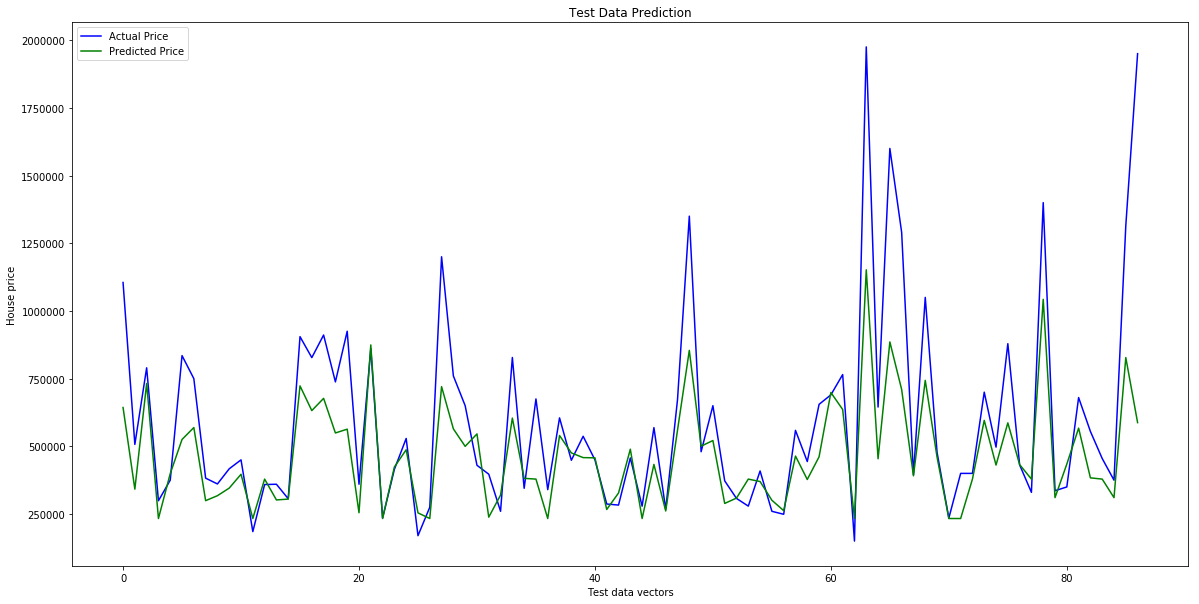

In [67]:
plt.figure(figsize=(20, 10))
plt.title('Test Data Prediction')
plt.xlabel('Test data vectors')
plt.ylabel('House price')


#sub-sample each 50nth entry
y_plot = inv_y_test[0::50]
pred_plot = inv_y_pred[0::50]

plt.plot(y_plot, 'b', label="Actual Price")
plt.plot(pred_plot, 'g', label="Predicted Price")
plt.legend(loc='upper left')
